In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf
from typing import Optional
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, TimeSeriesSplit, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.inspection import permutation_importance
from sklearn.metrics import roc_curve, roc_auc_score
from PairsTradingPipeline import PairsTradingPipeline

#### Start with BTC-IBIT results and move on to S&P 500-IVV. 
#### Therefore, Figure number is mixed.

# BTC-IBIT Result

### BTC price (Figure 1)

/Users/dohyeoplloydkim/Downloads/GRA4157/GRA 41574 (Big) Data Curation, Pipelines and Management/PairsTradingPipeline.py:104: FutureWarning: YF.download() has changed argument auto_adjust default to True
  self.data_raw_x = yf.download(
/Users/dohyeoplloydkim/Downloads/GRA4157/GRA 41574 (Big) Data Curation, Pipelines and Management/PairsTradingPipeline.py:110: FutureWarning: YF.download() has changed argument auto_adjust default to True
  self.data_raw_y = yf.download(


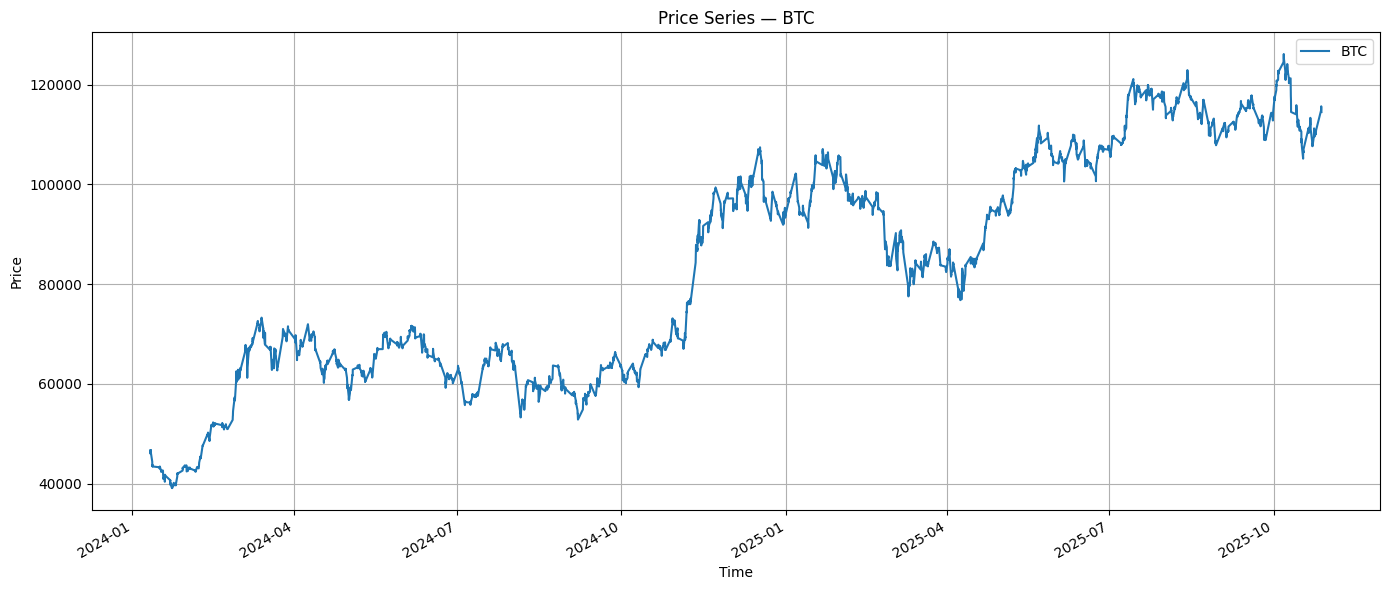

In [29]:
# 1) Instantiate the pipeline
pipe = PairsTradingPipeline(
    symbol_x="BTC-USD",
    symbol_y="IBIT",
    start="2024-01-11",
    end="2025-10-28",
    crypto=True, # important for resample_crypto()
    name_x="BTC",
    name_y="IBIT",
)

# 2) Download & build pair data
pipe.download_data()
pipe.resample_crypto()     

# Reproduces Figure 1
pipe.plot_prices()        

### BTC-IBIT Price spread, Rolling Z score of price spread, Trading signal (Figure 4~6)

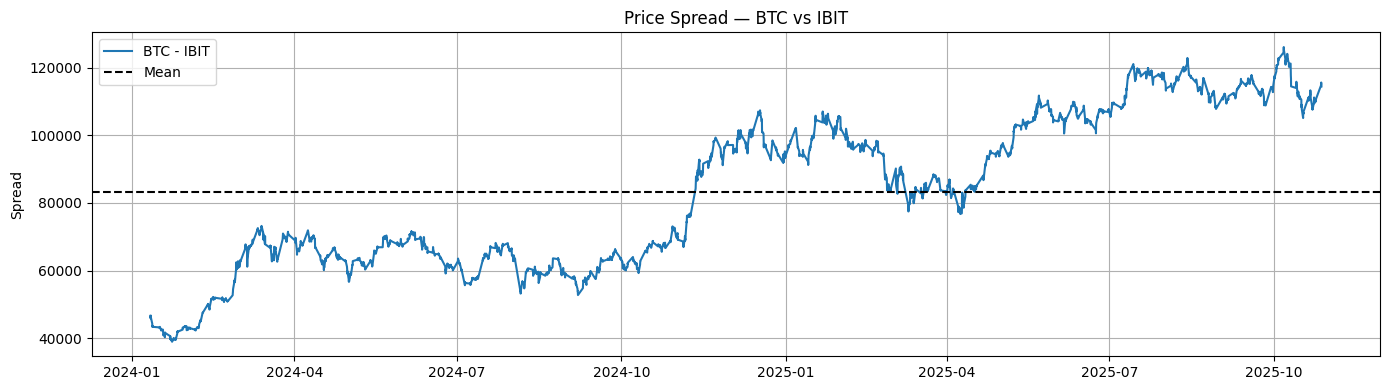

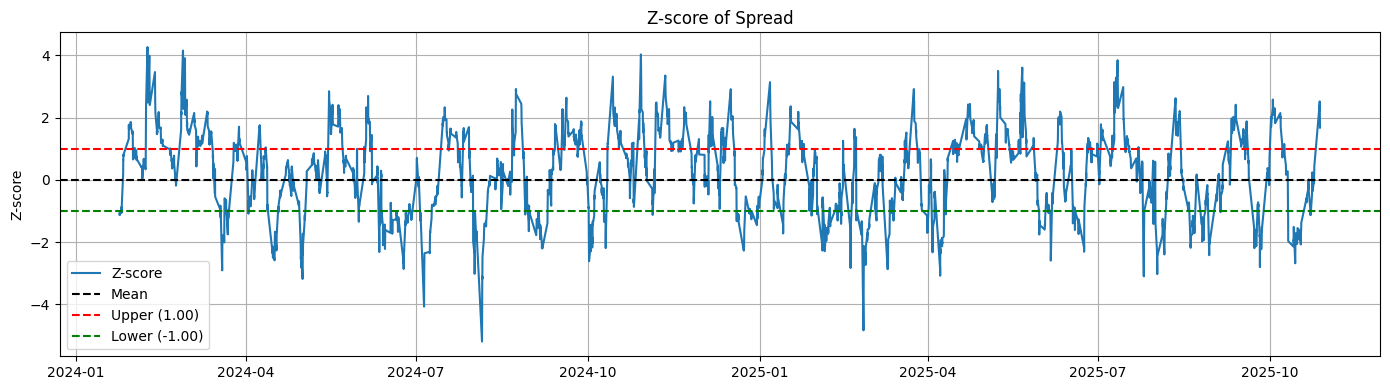

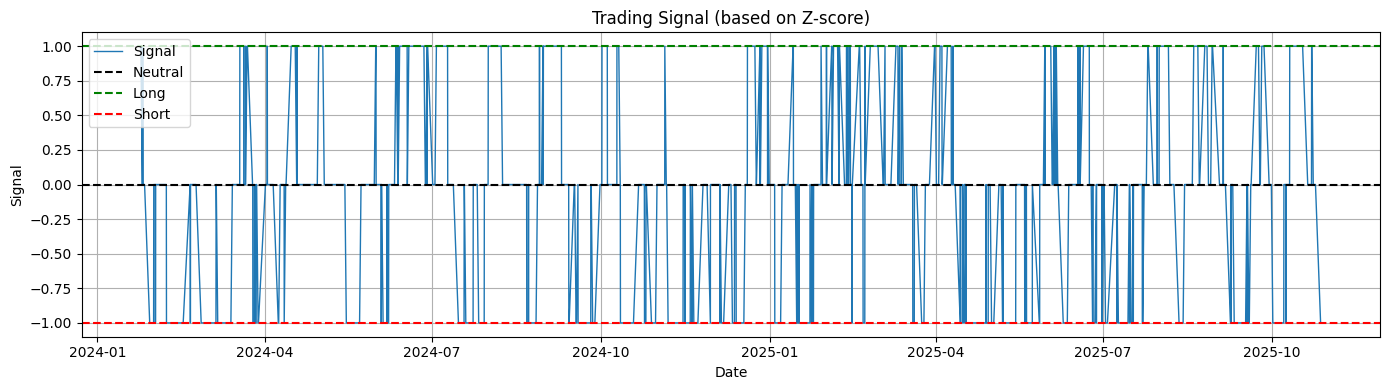

In [30]:
# 3) Build spread, z-score, signals and ploting
pipe.build_spread_and_zscore(window=60, upper=1.0, lower=-1.0)

# Reproduces Figure 4,5,6
pipe.plot_spread_zscore_signals()  

In [31]:
# 4) optimization of z-thresholds
upper_grid = np.arange(0.5, 0.7, 0.01)
lower_grid = np.arange(-1.2, -0.7, 0.01)

pipe.optimize_thresholds(upper_grid, lower_grid)
print("Best Z thresholds:", round(pipe.upper_threshold,3), round(pipe.lower_threshold,3))

Best Z thresholds: 0.63 -1.06


### Logistic Regression (Figure 7, Figure 9)

/opt/miniconda3/envs/tf/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/miniconda3/envs/tf/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing

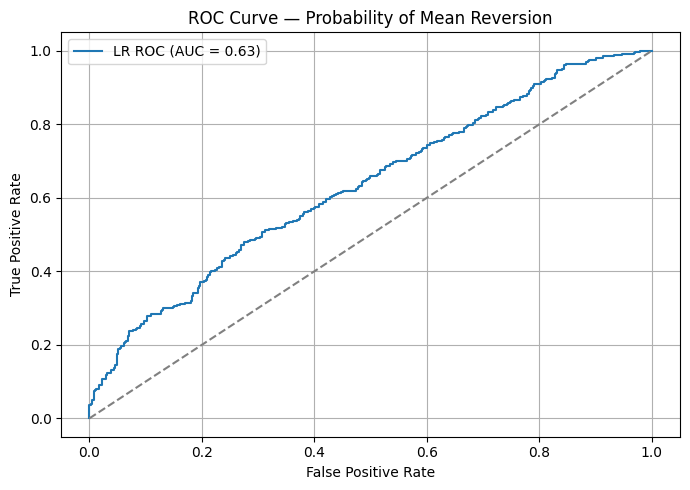

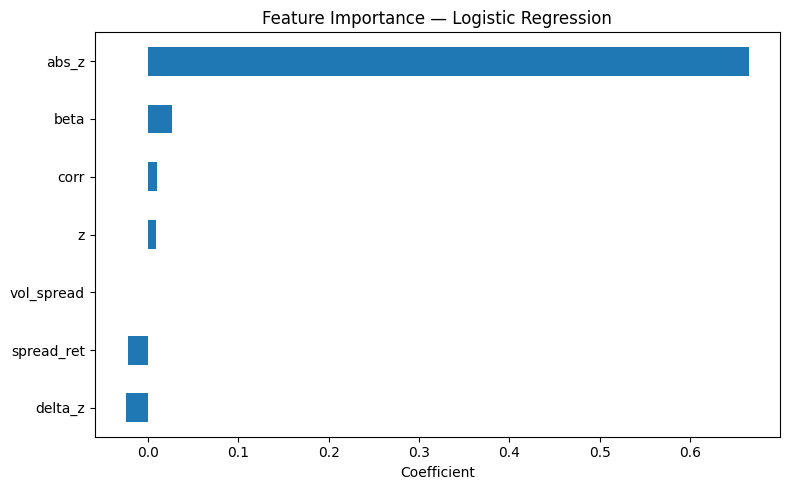

In [32]:
# 5) Build ML dataset - Logistic Regression
pipe.ml_dataset()

# Reproduces Figure 7
pipe.train_model(model_type="lr") # or hgb

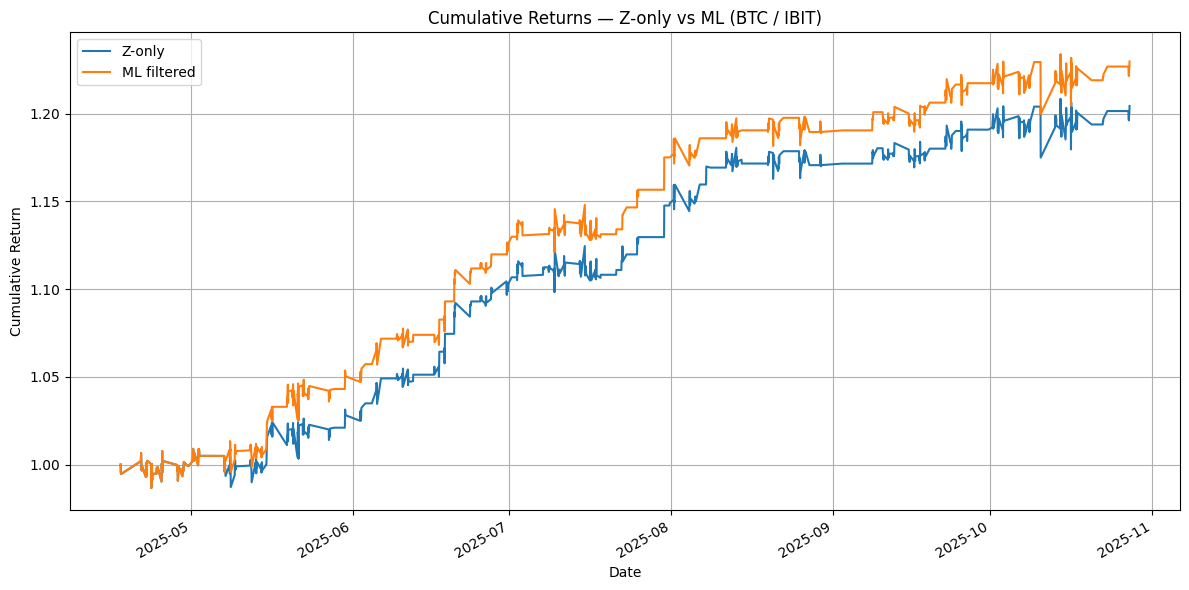


✅ TEST metrics (LR — BTC/IBIT)
Z-only              cum=1.2043  sharpe=1.9201  maxDD=-2.4334%
ML filtered         cum=1.2297  sharpe=2.1605  maxDD=-2.4334%

Trades:  Z-only=80,  ML filtered=90


In [33]:
# Reproduces Figure 9
pipe.evaluate_model()

### HistGradientBoostingClassifier (Figure 8, Figure 10)

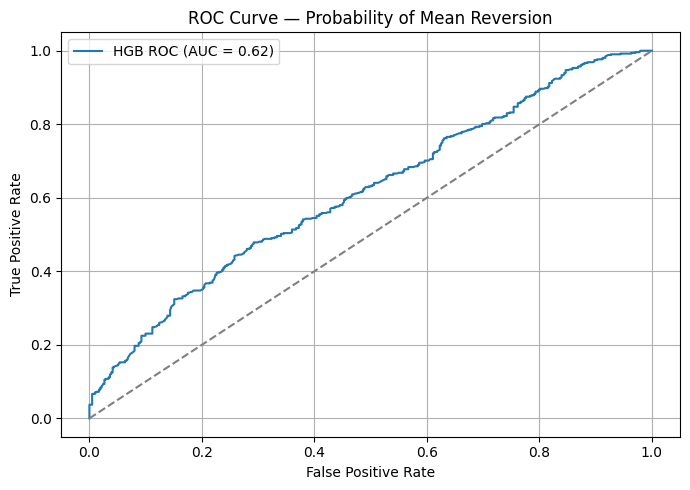

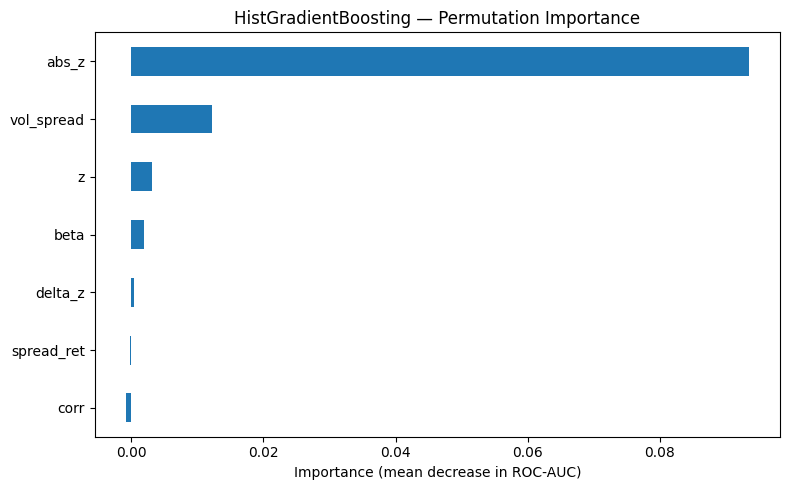

In [34]:
# Reproduces Figure 8
pipe.train_model(model_type="hgb")

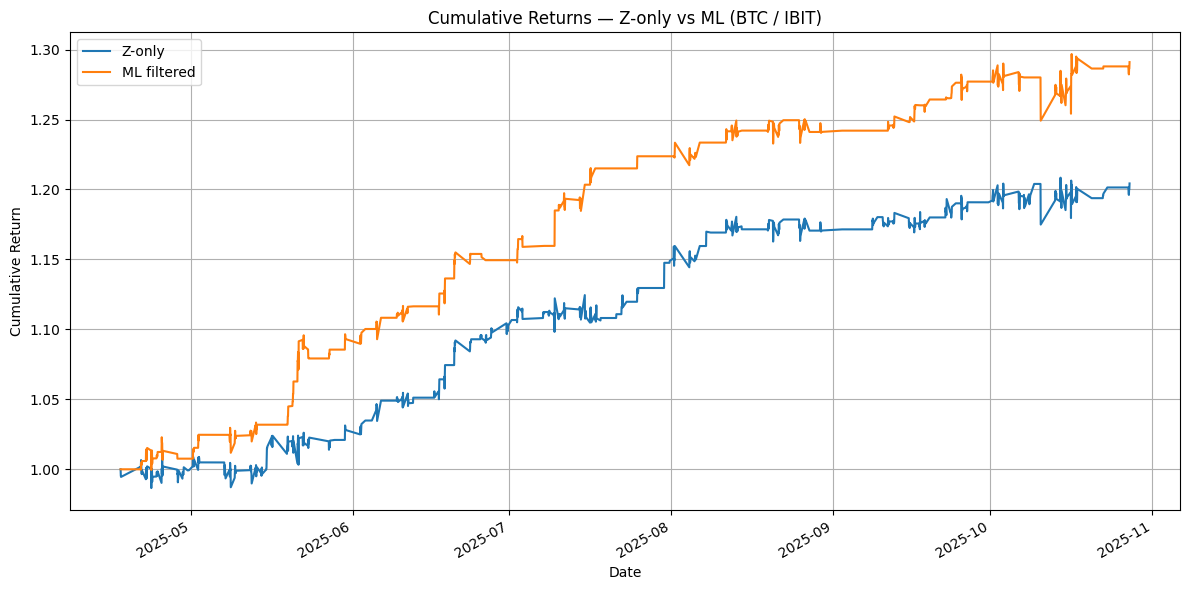


✅ TEST metrics (HGB — BTC/IBIT)
Z-only              cum=1.2043  sharpe=1.9201  maxDD=-2.4334%
ML filtered         cum=1.2911  sharpe=3.1014  maxDD=-3.1657%

Trades:  Z-only=80,  ML filtered=125


In [35]:
# Reproduces Figure 10
pipe.evaluate_model()

### Spread variance ratio

In [36]:
#BTC-IBIT
btc_ibit = PairsTradingPipeline(
    symbol_x="BTC-USD",
    symbol_y="IBIT",
    start="2024-01-11",
    end="2025-10-28",
    crypto=True, 
    name_x="BTC",
    name_y="IBIT",
)
btc_ibit.download_data()
btc_ibit.resample_crypto()     
     
#S&P 500-IVV
sp_ivv = PairsTradingPipeline(
    symbol_x="^GSPC",       
    symbol_y="IVV",         
    start="2024-01-11",
    end="2025-10-28",
    crypto=False,           
    name_x="S&P500",
    name_y="IVV",
)
sp_ivv.download_data()
sp_ivv.build_pair_dataset()


btc_ibit.build_spread_and_zscore()
sp_ivv.build_spread_and_zscore()
print(f"Spread variance ratio : {round(np.var(btc_ibit.spread.dropna()) / np.var(sp_ivv.spread.dropna()),2)}")


/Users/dohyeoplloydkim/Downloads/GRA4157/GRA 41574 (Big) Data Curation, Pipelines and Management/PairsTradingPipeline.py:104: FutureWarning: YF.download() has changed argument auto_adjust default to True
  self.data_raw_x = yf.download(
/Users/dohyeoplloydkim/Downloads/GRA4157/GRA 41574 (Big) Data Curation, Pipelines and Management/PairsTradingPipeline.py:110: FutureWarning: YF.download() has changed argument auto_adjust default to True
  self.data_raw_y = yf.download(
/Users/dohyeoplloydkim/Downloads/GRA4157/GRA 41574 (Big) Data Curation, Pipelines and Management/PairsTradingPipeline.py:104: FutureWarning: YF.download() has changed argument auto_adjust default to True
  self.data_raw_x = yf.download(
/Users/dohyeoplloydkim/Downloads/GRA4157/GRA 41574 (Big) Data Curation, Pipelines and Management/PairsTradingPipeline.py:110: FutureWarning: YF.download() has changed argument auto_adjust default to True
  self.data_raw_y = yf.download(


Spread variance ratio : 2595.36


# S&P 500–IVV Results

### S&P 500 price (Figure 2)

/Users/dohyeoplloydkim/Downloads/GRA4157/GRA 41574 (Big) Data Curation, Pipelines and Management/PairsTradingPipeline.py:104: FutureWarning: YF.download() has changed argument auto_adjust default to True
  self.data_raw_x = yf.download(
/Users/dohyeoplloydkim/Downloads/GRA4157/GRA 41574 (Big) Data Curation, Pipelines and Management/PairsTradingPipeline.py:110: FutureWarning: YF.download() has changed argument auto_adjust default to True
  self.data_raw_y = yf.download(


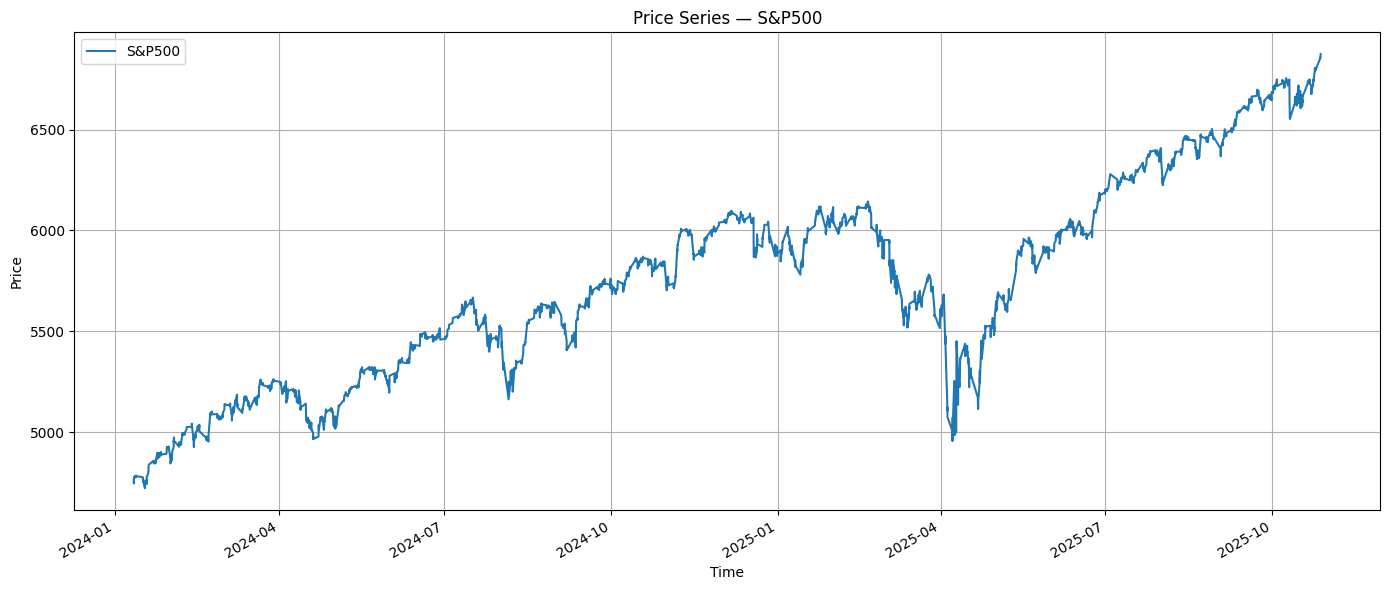

In [37]:
pipe = PairsTradingPipeline(
    symbol_x="^GSPC",       # S&P 500 Index
    symbol_y="IVV",         # iShares S&P 500 ETF
    start="2024-01-11",
    end="2025-10-28",
    crypto=False,           # this is NOT a crypto pair
    name_x="S&P500",
    name_y="IVV",
)

pipe.download_data()
pipe.build_pair_dataset()

# Reproduces Figure 2
pipe.plot_prices()

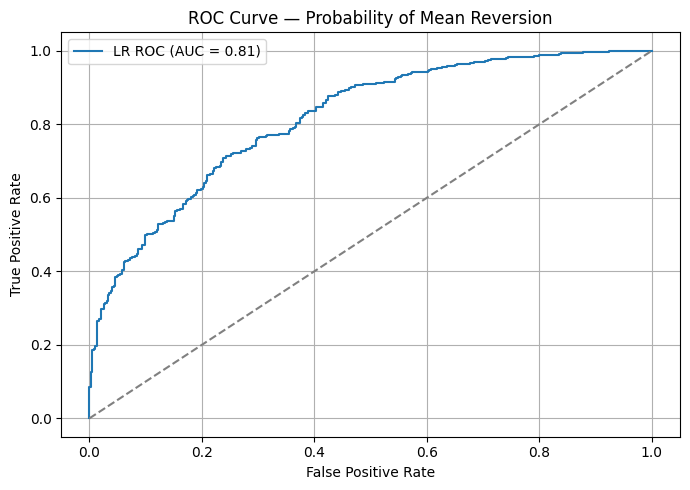

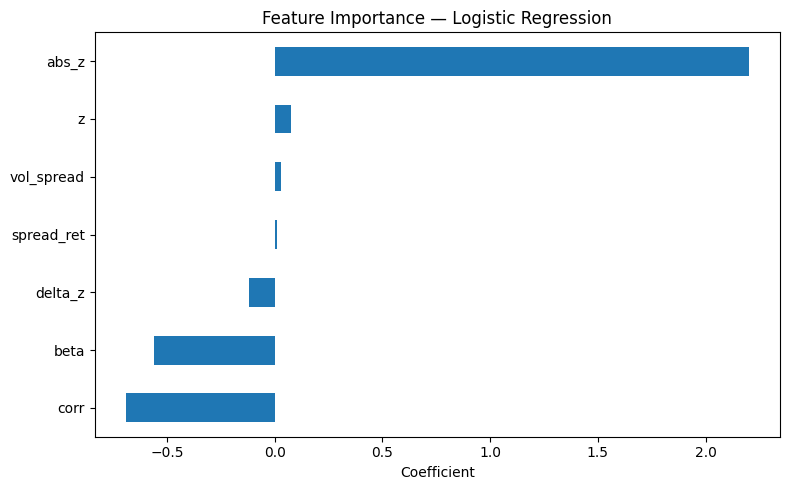

In [38]:
pipe.build_spread_and_zscore(
    window=8,
    upper=1.0,
    lower=-1.0
)
upper_grid = np.arange(0.50, 0.70, 0.01)
lower_grid = np.arange(-1.20, -0.70, 0.01)

results_z = pipe.optimize_thresholds(
    upper_grid=upper_grid,
    lower_grid=lower_grid
)

pipe.ml_dataset()
pipe.train_model(model_type="lr")

### Logistic Regression (Figure 11)

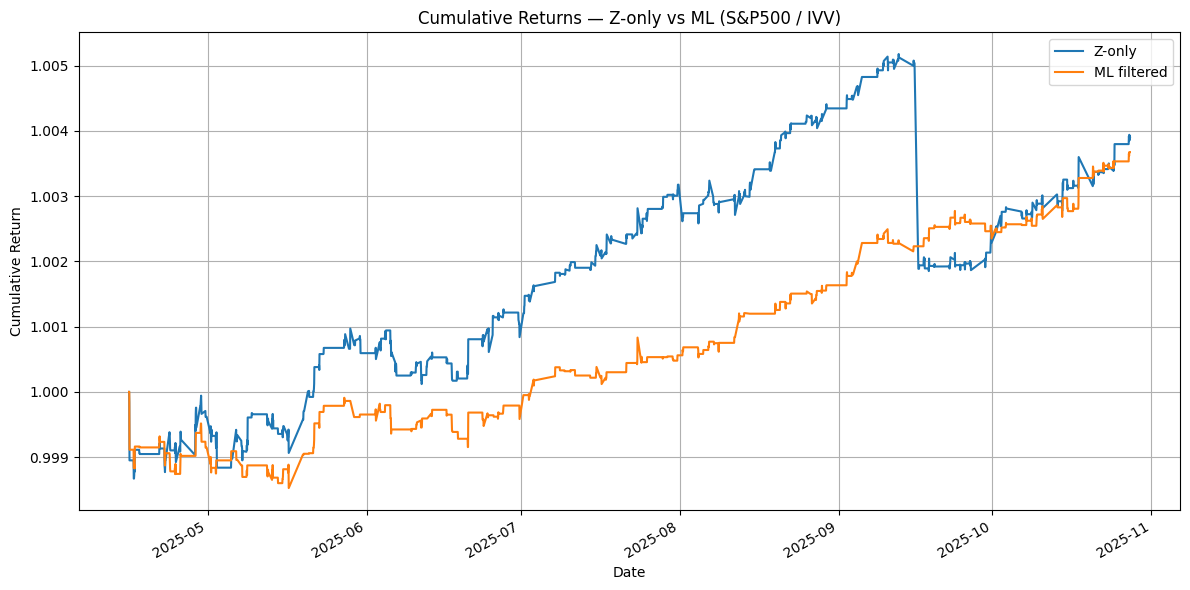


✅ TEST metrics (LR — S&P500/IVV)
Z-only              cum=1.0039  sharpe=1.1235  maxDD=-0.3310%
ML filtered         cum=1.0037  sharpe=2.0422  maxDD=-0.1475%

Trades:  Z-only=327,  ML filtered=294


In [39]:
# Reproduces Figure 11
pipe.evaluate_model()

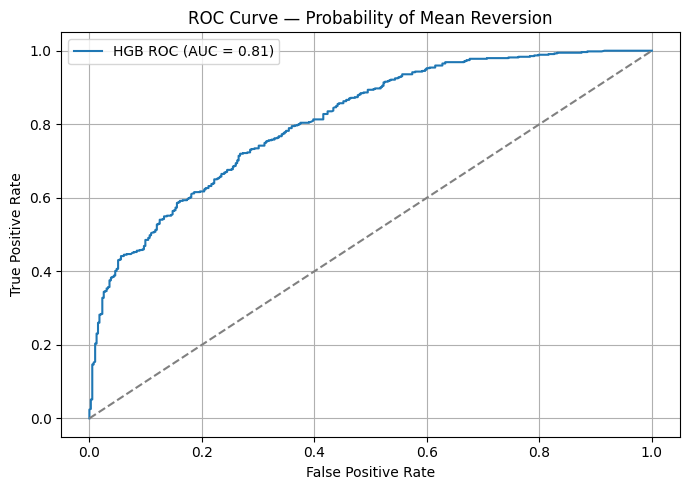

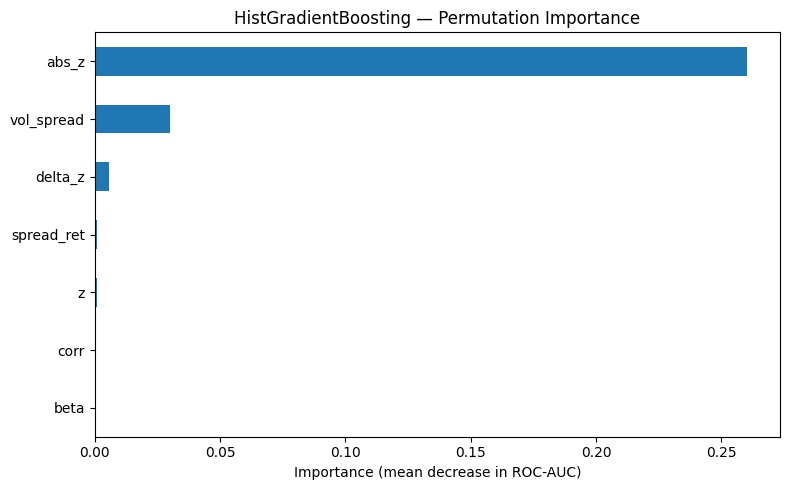

In [40]:
pipe.train_model(model_type="hgb")

### HistGradientBoostingClassifier (Figure 12)

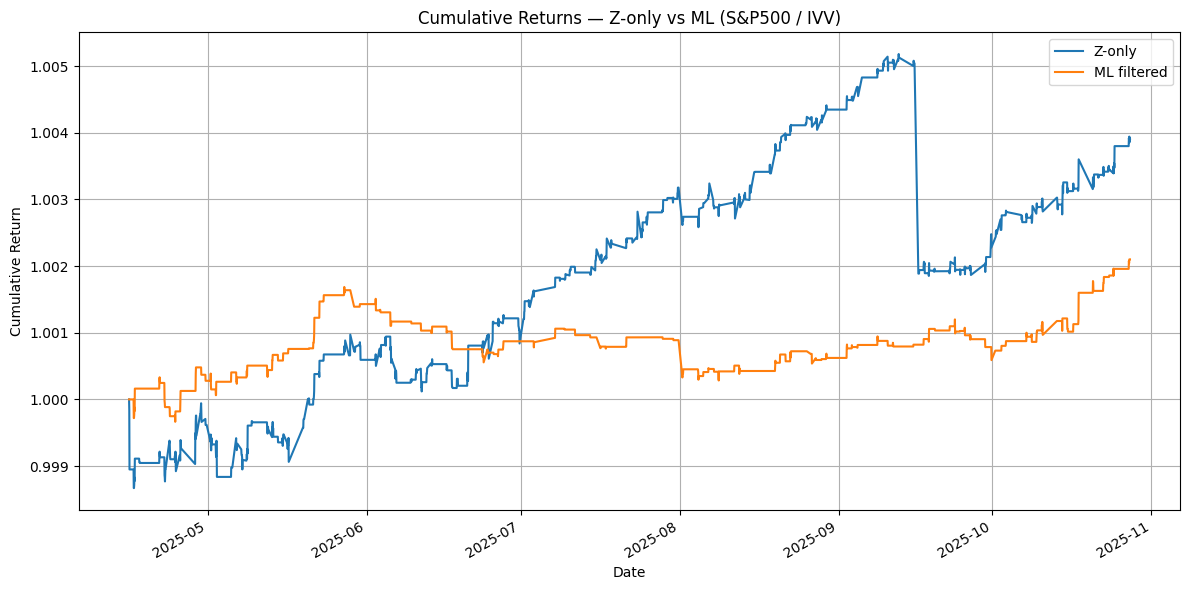


✅ TEST metrics (HGB — S&P500/IVV)
Z-only              cum=1.0039  sharpe=1.1235  maxDD=-0.3310%
ML filtered         cum=1.0021  sharpe=1.6422  maxDD=-0.1400%

Trades:  Z-only=327,  ML filtered=227


In [41]:
# Reproduces Figure 12
pipe.evaluate_model()

# Correlation Matrix (Figure 3)

/Users/dohyeoplloydkim/Downloads/GRA4157/GRA 41574 (Big) Data Curation, Pipelines and Management/PairsTradingPipeline.py:874: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(list(assets.keys()), start="2024-01-11", end="2025-10-28", progress=False)['Close']
/Users/dohyeoplloydkim/Downloads/GRA4157/GRA 41574 (Big) Data Curation, Pipelines and Management/PairsTradingPipeline.py:877: FutureWarning: YF.download() has changed argument auto_adjust default to True
  btc = yf.download(


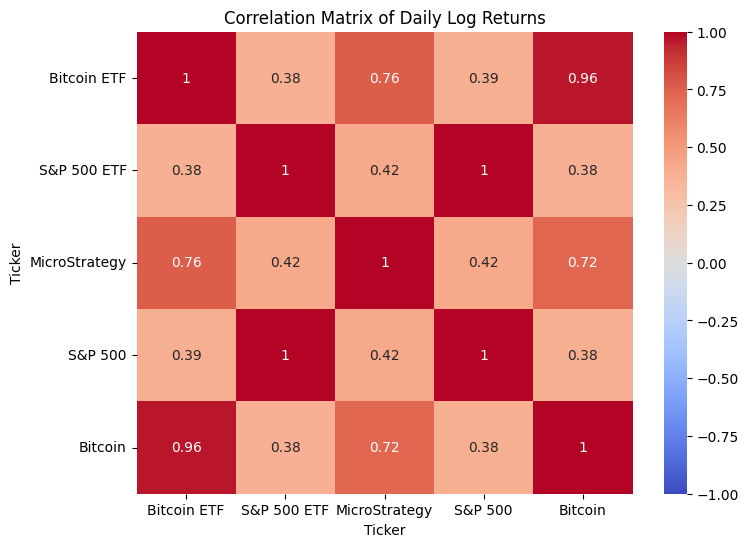

In [42]:
# Reproduces Figure 3
pipe.correlation()